# TOC

__Lab 03 - Optimization Theory__
1. [Import](#Import)
1. [Univariate gradient descent](#Univariate-gradient-descent)
    1. [Example 1 - basic single variable function](#Univariate-gradient-descent-Example1)
    1. [Example 2 - less basic single variable function](#Univariate-gradient-descent-Example2)
1. [Multivariate gradient descent](#Multivariate-gradient-descent)
    1. [Example 1 - multi variable function](#Multivariate-gradient-descent-Example1)

# Import

<a id = 'Import'></a>

In [1]:
import numpy as np

np.set_printoptions(threshold=np.inf, suppress=True)
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import warnings

warnings.simplefilter("ignore")
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:78% !important; }</style>"))

from scipy.optimize import newton
from sklearn.utils.testing import assert_almost_equal

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Univariate gradient descent

Given objective function $f(x)$, we want to find the local minimum and maximum values of the function. These are the $x$'s that yield $f(x)'$ == 0. These are the points of convergence. Gradient descent is accomplished by:

* Choosing a random starting point $x_0$.
* Calculating a better value of $x$ by $x_1 = x_0 - \eta * f(x)'$, where $\eta$ is the learning rate.
* Calculating progressively better $x$'s for $n$ steps by $x_n = x_{n-1} - \eta * f(x_{n-1})'$ until convergence. Convergence occurs at an acceptably small vall of $f(x)'$, ideally 0.

Univariate gradient descent succeeds by finding the value of $x$ where $f'(x)$ is (essentially) equal to 0. It does so by using the value returned by $f'(x)$ to determine if the trial solution $x$ needs to be increased or decreased, and continues re-evaluating the trial solution until it reaches a stopping point of some kind. In practice, this is typically a value of $x$ acceptably close to 0.

<a id = 'Univariate-gradient-descent'></a>

## Example 1 - basic single variable function

* Objective function: $f(x) = x^2 - 4x$
* $f(x)' = 2x$
* $x_0 = 2$
* learning rate $\eta$ = 0.1

Find the value of $x$ (the value of our decision variable) that minimizes $f(x)'$ using gradient descent. Also use scipy function newton.
- Perform gradient descent to find optimal value of $x$ for a simple function
- Visualize the steps
- Compare home grown custom model to scipy function


<a id = 'Univariate-gradient-descent-Example1'></a>

__Custom functions__

In [2]:
# custom functions
def gradientDescent(f, x0, e, eta, print_res=False):
    """
    Pefrom gradient descent using:
    f - first derivative
    x0 - starting position
    e - acceptability threshold
    eta - learning rate
    """
    delta = dx(f, x0)  # use function dx to calc abs distance from 0
    approx = [x0]  # create list to hold each x value tested during descent
    i = 0
    while delta > e:  # while distance from 0 is greater than acceptability threshold
        x0 = x0 - eta * f(x0)  # current x, minus eta times f(current x)'
        if i % 10 == 0:
            approx.append(x0)
        delta = dx(f, x0)  # new abs distance from 0
    if print_res:
        print("Root is at: {}".format(x0))
        print("f(x) at root is: ".format(f(x0)))
    return x0, approx  # final x, list of x values used on descent


def objectiveFunction(x):
    """
    returns result of objective function given x
    """
    return x ** 2 - 4


def f(x):
    """
    returns result of objective function's first derivative given x
    """
    return 2 * x


def dx(f, x):
    """
    given a value x, calculate abs distance of first derivative f from 0
    """
    return abs(0 - f(x))

In [3]:
# execute gradient descent
eta = 0.1
x0 = 2.7

scipyRoot = newton(f, x0, maxiter=100)  # scipy comparison
rootHomegrown, trace = gradientDescent(f, x0, 1e-5, eta)

table = pd.DataFrame(
    columns=[
        [
            "Iteration",
            "x_i",
            "f(x_i)",
            "Step Update (x_i+1 = x_i - alpha * f(x_i))",
            "x_i+1",
        ]
    ]
)

for i, t in enumerate(trace):
    if i + 1 == len(trace):
        break
    else:
        gradFormula = "2 * {0}".format(round(t, 3))
        stepUpdate = "x_i+1 = {0} - {1} * ({2})".format(round(t, 3), eta, gradFormula)
        table.loc[i] = [i, round(t, 3), gradFormula, stepUpdate, round(trace[i + 1], 5)]
assert_almost_equal(rootHomegrown, scipyRoot, decimal=5)

print("zero of f is {0} scipy".format(scipyRoot))
print("zero of f is {0} via homegrown".format(rootHomegrown))
print("f(x=root), where f(x) is the gradient function : {0}".format(f(scipyRoot)))
print(
    "f(x=root), where f(x) is the objective function : {0}".format(
        objectiveFunction(scipyRoot)
    )
)

table

zero of f is 0.0 scipy
zero of f is 4.137737960337901e-06 via homegrown
f(x=root), where f(x) is the gradient function : 0.0
f(x=root), where f(x) is the objective function : -4.0


,Iteration,x_i,f(x_i),Step Update (x_i+1 = x_i - alpha * f(x_i)),x_i+1
0,0,2.700,2 * 2.7,x_i+1 = 2.7 - 0.1 * (2 * 2.7),2.16000
1,1,2.160,2 * 2.16,x_i+1 = 2.16 - 0.1 * (2 * 2.16),1.72800
2,2,1.728,2 * 1.728,x_i+1 = 1.728 - 0.1 * (2 * 1.728),1.38240
3,3,1.382,2 * 1.382,x_i+1 = 1.382 - 0.1 * (2 * 1.382),1.10592
4,4,1.106,2 * 1.106,x_i+1 = 1.106 - 0.1 * (2 * 1.106),0.88474
5,5,0.885,2 * 0.885,x_i+1 = 0.885 - 0.1 * (2 * 0.885),0.70779
6,6,0.708,2 * 0.708,x_i+1 = 0.708 - 0.1 * (2 * 0.708),0.56623
7,7,0.566,2 * 0.566,x_i+1 = 0.566 - 0.1 * (2 * 0.566),0.45298
8,8,0.453,2 * 0.453,x_i+1 = 0.453 - 0.1 * (2 * 0.453),0.36239
9,9,0.362,2 * 0.362,x_i+1 = 0.362 - 0.1 * (2 * 0.362),0.28991


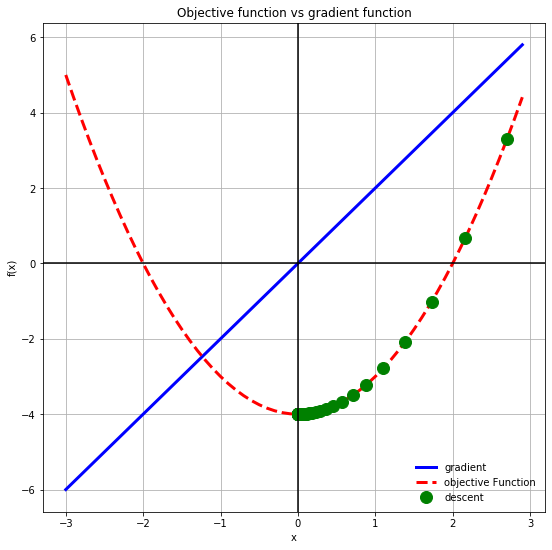

In [4]:
# visualize optimization
xs = np.arange(-3.0, 3.0, 0.1)

plt.figure(1, figsize=[9, 9])
plt.plot(xs, f(xs), color="b", linewidth=3, label="gradient")
plt.plot(xs, objectiveFunction(xs), "r--", linewidth=3, label="objective Function")
plt.plot(
    trace, list(map(objectiveFunction, trace)), "go", markersize=12, label="descent"
)

plt.axhline(y=0, color="k")
plt.axvline(x=0, color="k")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Objective function vs gradient function")
plt.legend(loc="lower right", frameon=False)

plt.grid()
plt.show()

## Example 2 - less basic single variable function
- Perform gradient descent to find optimal value of $x$ for a slightly more complicated function
- Visualize the steps
- Compare home grown custom model to scipy function


<a id = 'Univariate-gradient-descent-Example2'></a>

__Custom functions__

In [5]:
# custom functions
def gradientDescent(f, x0, e, eta, print_res=False):
    """
    Pefrom gradient descent using:
    f - first derivative
    x0 - starting position
    e - acceptability threshold
    eta - learning rate
    """
    delta = dx(f, x0)  # use function dx to calc abs distance from 0
    approx = [x0]  # create list to hold each x value tested during descent
    i = 0
    while delta > e:  # while distance from 0 is greater than acceptability threshold
        x0 = x0 - eta * f(x0)  # current x, minus eta times f(current x)'
        if i % 10 == 0:
            approx.append(x0)
        delta = dx(f, x0)  # new abs distance from 0
    if print_res:
        print("Root is at: {}".format(x0))
        print("f(x) at root is: ".format(f(x0)))
    return x0, approx  # final x, list of x values used on descent


def objectiveFunction(x):
    """
    returns result of objective function given x
    """
    return x ** 4 + 3 * x ** 3 + x ** 2 - x


def f(x):
    """
    returns result of objective function's first derivative given x
    """
    return 4 * x ** 3 + 9 * x ** 2 + 2 * x - 1


def dx(f, x):
    """
    given a value x, calculate abs distance of first derivative f from 0
    """
    return abs(0 - f(x))

In [6]:
# execute gradient descent
eta = 0.1
x0 = 1.5

scipyRoot = newton(f, x0, maxiter=100)  # scipy comparison
rootHomegrown, trace = gradientDescent(f, x0, 1e-5, eta)

table = pd.DataFrame(columns=[["Iteration", "x_i", "x_i+1"]])

for i, t in enumerate(trace):
    if i + 1 == len(trace):
        break
    else:
        table.loc[i] = [i, round(t, 3), round(trace[i + 1], 6)]
# assert_almost_equal(rootHomegrown, scipyRoot, decimal = 5)

print("zero of f is {0} scipy".format(scipyRoot))
print("zero of f is {0} via homegrown".format(rootHomegrown))
print("f(x=root), where f(x) is the gradient function : {0}".format(f(scipyRoot)))
print(
    "f(x=root), where f(x) is the objective function : {0}".format(
        objectiveFunction(scipyRoot)
    )
)

table

zero of f is 0.2322396186132195 scipy
zero of f is -1.9222249498723367 via homegrown
f(x=root), where f(x) is the gradient function : 0.0
f(x=root), where f(x) is the objective function : -0.13781766897853814


,Iteration,x_i,x_i+1
0,0.0,1.500,-2.075000
1,1.0,-2.075,-1.861394
2,2.0,-1.861,-1.927690
3,3.0,-1.928,-1.921232
4,4.0,-1.921,-1.922396
5,5.0,-1.922,-1.922195
6,6.0,-1.922,-1.922230
7,7.0,-1.922,-1.922224
8,8.0,-1.922,-1.922225


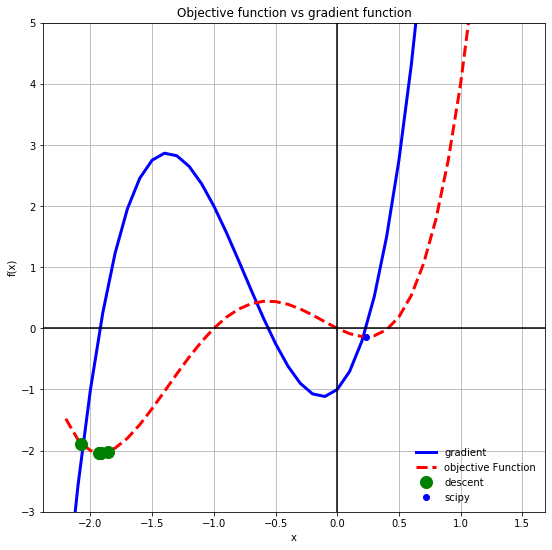

In [7]:
# visualize optimization
xs = np.arange(-2.2, 1.6, 0.1)

plt.figure(1, figsize=[9, 9])
plt.plot(xs, f(xs), color="b", linewidth=3, label="gradient")
plt.plot(xs, objectiveFunction(xs), "r--", linewidth=3, label="objective Function")
plt.plot(
    trace, list(map(objectiveFunction, trace)), "go", markersize=12, label="descent"
)
plt.plot(scipyRoot, objectiveFunction(scipyRoot), "bo", label="scipy")

plt.axhline(y=0, color="k")
plt.axvline(x=0, color="k")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.ylim([-3, 5])
plt.title("Objective function vs gradient function")
plt.legend(loc="lower right", frameon=False)

plt.grid()
plt.show()

# Multivariate gradient descent

Multivariate scenarios are complicated by the fact that for each variable in the function, or for each $x$ in the vector $\textbf{x}$, there is a possible direction of increasing or decreasing movement. The path of descent goes from being bi-directional to multi-directional. 

To accomplish this multi-directional descent, a starting vector $\textbf{x}$ of trial values is selected. The gradient $\nabla f(\textbf{x})$ is calculated for the starting vector $\textbf{x}$. The gradient itself is a vector comprised of partial derivatives evaluated at $\textbf{x}$, and points in the direction of steepest descent at that point.

The gradient is used to determine a fixed direction in which to move, and the trial solution advances in that direction until $f(\textbf{x})$ stops increasing. The point at which this happens is the next trial vector $\textbf{x}$, and this completes the first iteration. The second iteration begins by calculating the new gradient based on the new trial vector, followed by the determination of the next direction to move and this process continues until $\nabla f(\textbf{x})$ = 0, or is within a tolerance level $\epsilon$. Mathematically, the process proceeds as follows:

1. Select tolerance level $\epsilon$ and a starting vector $\textbf{x}$.
2. Write $f(\textbf{x} + t\nabla f(\textbf{x}))$ as a function of $t$. This is shorthand for $x_j = x_j + t(\frac{\partial f}{\partial x_j})$ for all $j$ values in vector $\textbf{x}$. Substitute each value of $x_j$ into its respective position in the original function $f(\textbf{x})$ to get our function of $t$.
3. Find the value of $t$ that maximizes $f(\textbf{x} + t\nabla f(\textbf{x}))$ over $t >= 0$.
4. Reset: $\textbf{x} = \textbf{x} + t^*\nabla f(\textbf{x})$, and evaluate against the tolerance level by seeing if each and every partial derivative is less than $\epsilon$. If this is the case, use $\textbf{x}$ as the approximated optimal solution. Otherwise, do another iteration.

An often cited analogy is to consider that you need to climb a hill. Your position is described by $(x_1,x_2)$, and the function $f(x_1,x_2)$ describes your height at that position. You cannot see the top of the hill, but you can observe the ground immediately surrounding your location and can see the direction in which the hill is sloping upward most sharply. You walk in this direction, in a straight line, until the slope is flat. Once arriving at the flat location, you re-eavluate the direction of steepest ascent, and walk in that direction. This zigzag pattern repeats until the slope is flat all around you.

Consider the function, which returns our height given our starting position:

$$
f(\textbf{x}) = f(x_1,x_2) = 2x_1x_2 + 2x_2 + x_1^2 - 2x_2^2
$$

The gradient is equal to:

$$ 
\nabla f(\textbf{x}) 
= \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \end{bmatrix}
= \begin{bmatrix} 2x_2 + 2x_1 \\ 2x_1 + 2 - 4x_2 \end{bmatrix}
$$

Let's start with an initial vector $\textbf{x}$ of (0,0). The gradient evaluates to:

$$ 
\nabla f(0,0) 
= \begin{bmatrix} 0 \\ 2 \end{bmatrix}
$$

Assuming we have not found an acceptable minimum, we need to perform an iteration. This begins by setting:

$$
x_1 = x_1 + t(\frac{\partial f}{\partial x_1}) = 0 + t(0) = 0
\\
x_2 = x_2 + t(\frac{\partial f}{\partial x_2}) = 0 + t(2) = 2t
$$

and then substituting the resulting values back into the original function $f(\textbf{x})$ to obtain:

$$
f(\textbf{x} + t\nabla f(\textbf{x})) = f(0,2t) = 2(0)(2t) + 2(2t) + (0)^2 - 2(2t)^2 = 4t - 8t^2
$$

The goal is to determine the value of $t$ that maximizes this function $4t - 8t^2$. Since this a function of one variable, find the derivative, set that equal to 0 and solve for t. We solve for zero because this is where the slope of the original function $4t - 8t^2$ is at its maximum:

$$
\frac{d}{dt}(4t - 8t^2) = 4 - 16t = 0
$$ 

yields $t = \frac{1}{4}$

Reset our position and complete the first iteration by:

$$
\textbf{x}_{reset} = \textbf{x} + t^*\nabla f(\textbf{x}) = (0,0) + \frac{1}{4}(0,2) = (0,\frac{1}{2})
$$

Our new position is $(0,\frac{1}{2})$, and the gradient $\nabla f(0,\frac{1}{2})$ is equal to $(1,0)$. In quick succession, this second iteration is completed using the same equations as above:

$$
x_1 = x_1 + t(\frac{\partial f}{\partial x_1}) = 0 + t(1) = t
\\
x_2 = x_2 + t(\frac{\partial f}{\partial x_2}) = \frac{1}{2} + t(0) = \frac{1}{2}
\\
f(\textbf{x} + t\nabla f(\textbf{x})) = f(t,\frac{1}{2}) = 2(t)(\frac{1}{2}) + 2(\frac{1}{2}) + t^2 - 2(\frac{1}{2})^2 = t - t^2 + \frac{1}{2}
\\
\frac{d}{dt}(t - t^2 + \frac{1}{2}) = 1 - 2t = 0
$$

yields $t = \frac{1}{2}$, and reseting our position by:

$$
\textbf{x}_{reset} = \textbf{x} + t^*\nabla f(\textbf{x}) = (0,\frac{1}{2}) + \frac{1}{2}(1,0) = (0,\frac{1}{2})
$$

and this completes the second iteration.


<a id = 'Multivariate-gradient-descent'></a>

## Example 1 - multiple variable function

- Perform gradient descent to find optimal values of $x_1$ and $x_2$ for a multivariate function
- Visualize the steps

Find the extreme (stationary) point of this function of two variables:

$$f(\textbf{x}) = f(x_1,x_2) = (x_2 - x_1)^4 + 8x_1x_2 - x_1 + x_2 + 3$$

The function has the following stationary points:

$ x1=[-0.42 \ \ 0.42]^T, \  \ x2=[-0.13 \ \ 0.13]^T,$ and  $x3=[0.55 \ \ -0.55]^T $

This function has the gradient:

$$ 
\nabla f(\textbf{x}) 
= \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \end{bmatrix}
= \begin{bmatrix} -4(x_2 - x_1)^3 + 8x_2 - 1 \\ 4(x_2 - x_1)^3 + 8x_1 + 1 \end{bmatrix}
$$

And the second partial derivatives constitute the hessian matrix (not needed in the code below, but the lab included it and I learned what a Hessian matrix is):

$$ 
\nabla f(\textbf{x}) 
= \begin{bmatrix} \frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} \\ \frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} \end{bmatrix}
= \begin{bmatrix} 12(x_2 - x_1)^2 & -12(x_2 - x_1)^2 + 8 \\ -12(x_2 - x_1)^2 + 8 & 12(x_2 - x_1)^2 \end{bmatrix}
$$



<a id = 'Multivariate-gradient-descent-Example1'></a>

__Custom functions__

In [8]:
# custom functions
class multivariateGD(object):
    def __init__(
        self,
        func,
        gradient,
        hessian,
        startPoint,
        stepSize=0.8,
        numIter=100,
        tol=0.000001,
    ):
        """
        
        """
        self.func = func
        self.gradient = gradient
        self.hessian = hessian
        self.startPoint = np.array(startPoint)
        self.stepSize = stepSize
        self.numIter = numIter
        self.tol = tol
        self.approach = []

    def rootFinder(self):
        """
        
        """
        x_t = self.startPoint
        self.approach.append(x_t)

        for i in range(self.numIter):
            x_tplus1 = x_t - self.stepSize * np.array(gradient(x_t))
            if abs(max(x_tplus1 - x_t)) < self.tol:
                break
            x_t = x_tplus1
            self.approach.append(x_t)

        self.critPoint = x_tplus1
        self.maxMin = self.func(x_t)

        return (self.critPoint, self.maxMin)

    def criticalPoint(self):
        """
        
        """
        print(self.critPoint)

    def plot(self):
        samples = 100
        x0 = np.linspace(-1.0, 1.0, samples)
        x1 = np.linspace(-1.0, 1.0, samples)
        x0, x1 = np.meshgrid(x0, x1)
        D = np.empty((samples ** 2, samples ** 2))
        D[0] = np.reshape(x0, samples ** 2)
        D[1] = np.reshape(x1, samples ** 2)
        Z = self.func(D)
        Z = np.reshape(Z, (samples, samples))

        fig = plt.figure(figsize=(14, 10))
        ax = Axes3D(fig)

        T = np.transpose(self.approach)
        TZ = self.func(T)
        ax.plot(T[0], T[1], TZ, alpha=0.5, marker="o", c="K")

        surf = ax.plot_surface(
            x0,
            x1,
            Z,
            rstride=1,
            cstride=1,
            cmap=cm.coolwarm,
            alpha=0.5,
            linewidth=0,
            antialiased=False,
        )

        ax.set_zlim(0.0, 15.0)

        ax.azim = 25
        ax.elev = 10

        fig.colorbar(surf, shrink=0.5, aspect=10)

        plt.title("Bivariate Gradient Descent")
        plt.axis((-1, 1, -1, 1))
        plt.xlabel("x1 Value")
        plt.ylabel("x2 Value")
        plt.show()

        plt.figure(figsize=(8, 8))
        cx = plt.subplot(1, 1, 1, facecolor="Silver")
        plt.grid(b=True, which="major", color="w", linestyle="-")
        plt.axis((-1, 1, -1, 1))
        plt.scatter(T[0], T[1], marker="o", c="k")
        plt.contour(
            x0,
            x1,
            Z,
            levels=np.logspace(0.01, 2.0, 20),
            cmap="rainbow",
            linewidths=2.0,
            alpha=0.5,
        )
        plt.title("Bivariate Gradient Descent Countour")
        plt.xlabel("x1 Value")
        plt.ylabel("x2 Value")
        plt.show()

        return

In [9]:
# execute gradient descent
if __name__ == "__main__":

    def objectiveFunction(x):
        x1 = x[0]
        x2 = x[1]
        return (x2 - x1) ** 4 + 8 * x1 * x2 - x1 + x2 + 3

    def gradient(x):
        x1 = x[0]
        x2 = x[1]
        return [-4 * (x2 - x1) ** 3 + 8 * x2 - 1, 4 * (x2 - x1) ** 3 + 8 * x1 + 1]

    def hessian(x):
        x1 = x[0]
        x2 = x[1]
        return [
            [12 * (x2 - x1) ** 2, -12 * (x2 - x1) ** 2 + 8],
            [-12 * (x2 - x1) ** 2 + 8, 12 * (x2 - x1) ** 2],
        ]

    xzeroGuess = [-0.9, 0.9]
    mvGD = multivariateGD(
        objectiveFunction, gradient, hessian, xzeroGuess, stepSize=0.01, numIter=100
    )
    anOptimum = mvGD.rootFinder()
    print("A potential optimum is located at: {0}".format(anOptimum))

A potential optimum is located at: (array([-0.4187944,  0.4187944]), 2.9266582192875643)


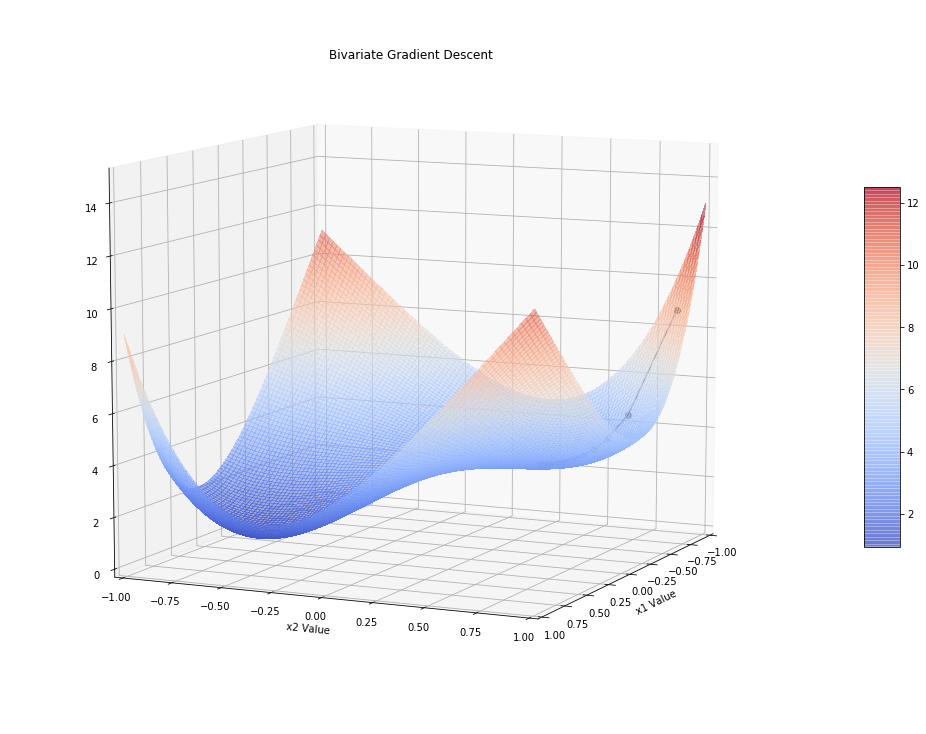

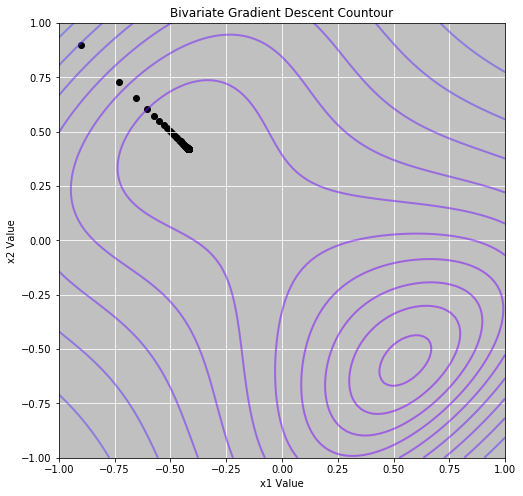

In [10]:
# visualize optimization
mvGD.plot()